<a href="https://colab.research.google.com/github/Girisha-Malni-builds01/Girisha-AI-Practice-Notebook/blob/Supervised-AI-Algorithms/Girisha's_Logistic_Regression_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression from Scratch**

# "Will my cat sit on my laptop?"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
n_samples = 200

laptop_warmth = np.random.rand(n_samples) * 10   # 0-10
time_of_day = np.random.randint(0, 2, n_samples) # 0 = day, 1 = night
owner_attention = np.random.randint(0, 2, n_samples) # 0 = chill, 1 = working

X = np.c_[laptop_warmth, time_of_day, owner_attention]


In [3]:
y = ( (laptop_warmth > 5) & (time_of_day == 1) ) | (owner_attention == 1)
y = y.astype(int)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## **Logistic regression training**

In [7]:

def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    X = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X.shape[1])
    losses = []

    for epoch in range(epochs):
        z = np.dot(X, theta)
        predictions = sigmoid(z)

        loss = -np.mean(y*np.log(predictions + 1e-9) + (1-y)*np.log(1-predictions + 1e-9))
        losses.append(loss)

        gradient = np.dot(X.T, (predictions - y)) / y.size
        theta -= lr * gradient

    return theta, losses

In [8]:
theta, losses = train_logistic_regression(X_train, y_train, lr=0.1, epochs=1000)


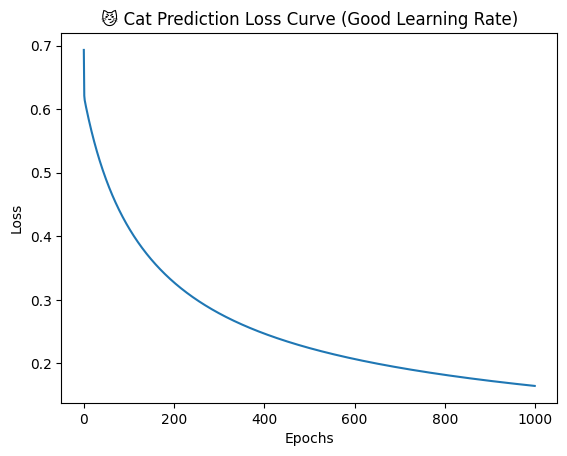

In [9]:
plt.plot(losses)
plt.title("😼 Cat Prediction Loss Curve (Good Learning Rate)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [10]:
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = sigmoid(np.dot(X_test_bias, theta)) >= 0.5
accuracy = np.mean(y_pred == y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 100.00%


## **Plot decision boundary (warmth vs attention)**

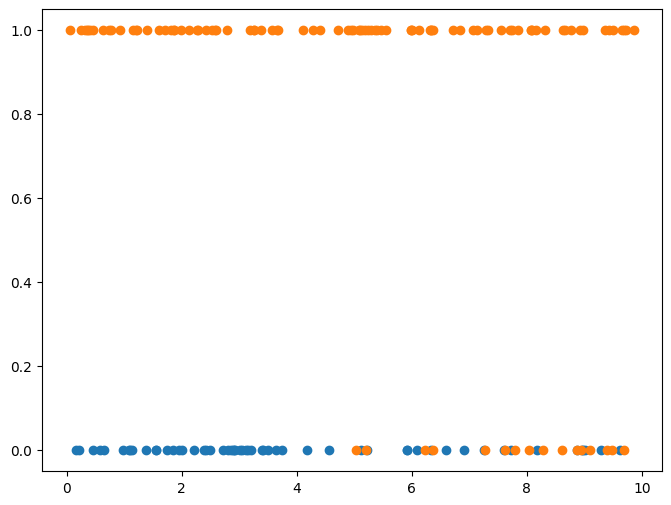

In [11]:
plt.figure(figsize=(8,6))
for label in [0,1]:
    plt.scatter(X_train[y_train==label][:,0], X_train[y_train==label][:,2], label=f"Cat Sit={label}")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


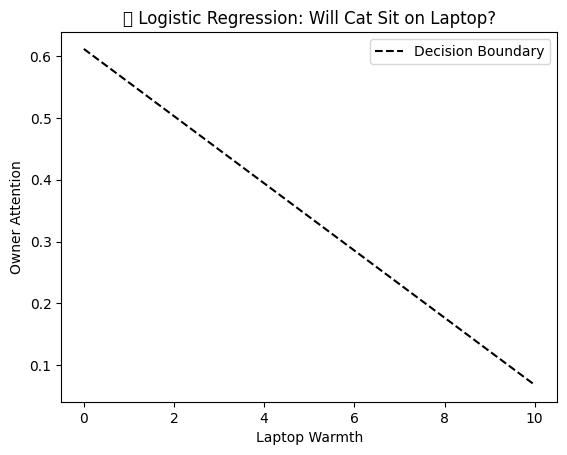

In [12]:
x_boundary = np.linspace(0,10,100)
boundary = -(theta[0] + theta[1]*x_boundary) / theta[3]
plt.plot(x_boundary, boundary, 'k--', label="Decision Boundary")
plt.xlabel("Laptop Warmth")
plt.ylabel("Owner Attention")
plt.legend()
plt.title("🐾 Logistic Regression: Will Cat Sit on Laptop?")
plt.show()


Wrong learning rate demo

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


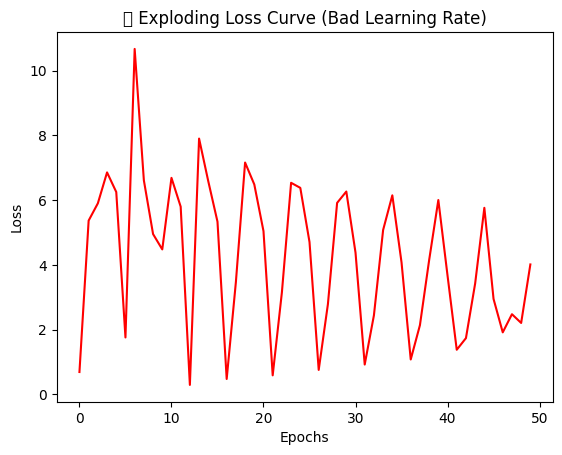

In [13]:
theta_bad, losses_bad = train_logistic_regression(X_train, y_train, lr=5, epochs=50)

plt.plot(losses_bad, color='red')
plt.title("🔥 Exploding Loss Curve (Bad Learning Rate)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [14]:
try:
    from ipywidgets import interact, FloatSlider, IntSlider
except ImportError:
    print("Please install ipywidgets to enable interaction: pip install ipywidgets")

def predict_cat(laptop_warmth=5.0, time_of_day=0, owner_attention=0):
    x_input = np.array([1, laptop_warmth, time_of_day, owner_attention])
    prob = sigmoid(np.dot(x_input, theta))
    decision = "😸 Cat WILL sit!" if prob >= 0.5 else "🙀 Cat will NOT sit."
    print(f"Probability = {prob:.2f} → {decision}")

interact(
    predict_cat,
    laptop_warmth=FloatSlider(min=0,max=10,step=0.5,value=5),
    time_of_day=IntSlider(min=0,max=1,step=1,value=0,description="Night?"),
    owner_attention=IntSlider(min=0,max=1,step=1,value=0,description="Working?")
)

interactive(children=(FloatSlider(value=5.0, description='laptop_warmth', max=10.0, step=0.5), IntSlider(value…

<function __main__.predict_cat(laptop_warmth=5.0, time_of_day=0, owner_attention=0)>

# **Visualizing decision boundary updates during training**

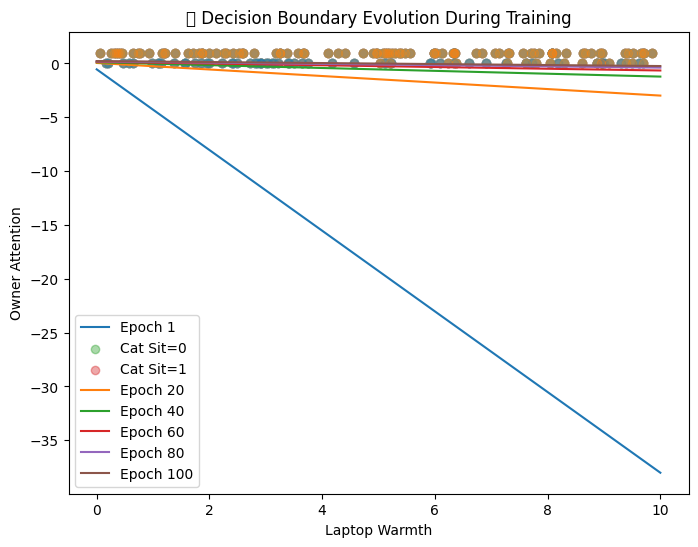

In [15]:


def train_and_visualize(X, y, lr=0.1, epochs=100, interval=10):
    """
    Train logistic regression and show boundary updates every `interval` epochs.
    """
    X_bias = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X_bias.shape[1])

    plt.figure(figsize=(8,6))

    for epoch in range(1, epochs+1):
        z = np.dot(X_bias, theta)
        predictions = sigmoid(z)

        # Gradient descent step
        gradient = np.dot(X_bias.T, (predictions - y)) / y.size
        theta -= lr * gradient

        # Plot decision boundary every `interval` steps
        if epoch % interval == 0 or epoch == 1 or epoch == epochs:
            x_boundary = np.linspace(0,10,100)
            boundary = -(theta[0] + theta[1]*x_boundary) / theta[3]

            # Scatter plot of training data
            for label in [0,1]:
                plt.scatter(X[y==label][:,0], X[y==label][:,2], alpha=0.4, label=f"Cat Sit={label}" if epoch==interval else "")

            plt.plot(x_boundary, boundary, label=f"Epoch {epoch}")

    plt.xlabel("Laptop Warmth")
    plt.ylabel("Owner Attention")
    plt.title("🐾 Decision Boundary Evolution During Training")
    plt.legend()
    plt.show()

train_and_visualize(X_train, y_train, lr=0.1, epochs=100, interval=20)
